# Steps in a data analysis

## 1. Define the question

### General Question
Can I automatically detect emails that are SPAM or not?

### Make it concrete
Can I use quantitative characteristics of the emails to classify them as SPAM/HAM?

## 2. Define the ideal data set

The data set may depend on your goal
* Descriptive - a whole population
* Exploratory - a random sample with many variables measured
* Inferential - the right population, randomly sampled
* Predictive - a training and test data set from the same popultaion
* Causal - data from a randomized study
- Mechanistic - data about all components of the system

### Example
Ideal case would be the whole data in datacenters of gmail

## 3. Determine what data you can access
* Sometimes you can find data free on the web
* Other times you may need to buy the data
* Be sure to respect the term of use
* If the data doesn't exist, you may need to generate it yourserlf.

### Example
Getting the data from the google servers is not possible. A possible solution is the data from UCI repository Sapmbase Data Set : https://archive.ics.uci.edu/ml/datasets/spambase

## 4. Obtain the data
* Try to obtain the raw data
* Be sure to reference the source
* Polite emails go a long way
* If you will load the data from an internet source, record the url and time accessed

### Our dataset
We'll use the dataset from the kernlab package in R. Its link is : http://search.r-project.org/library/kernlab/html/spam.html

In [1]:
install.packages("kernlab",repos = "https://cran.ma.imperial.ac.uk/")

Installing package into 'C:/Users/naqee/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\naqee\AppData\Local\Temp\RtmpofENBj\downloaded_packages


## 5. Clean the data
* Raw data often needs to be processed
* If it is pre-processed, make sure you understand how
* Understand the source of the data(census,sample,convenience sample,etc)
* May need reformating, subsampling -record these steps
* Determine if the data is good enough - if not quit or change data

### Our cleaned dataset

In [2]:
library(kernlab)
data(spam)
str(spam[,1:5])

'data.frame':	4601 obs. of  5 variables:
 $ make   : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ address: num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ all    : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ num3d  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ our    : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...


### Subsampling out dataset

In [3]:
set.seed(3435)
trainIndicator <- rbinom(4601,size=1,prob=0.5)
table(trainIndicator)

trainIndicator
   0    1 
2314 2287 

In [4]:
trainSpam <- spam[trainIndicator==1,]
testSpam <- spam[trainIndicator==0,]

## 6. Exploratory data anlysis
* Look at the summaries of the data
* Check for missing data
* Create Exploratory plots
* Perform exploratory analyses(e.g.clustering)

### Names

In [5]:
names(trainSpam)

[1] "make"              "address"           "all"              
 [4] "num3d"             "our"               "over"             
 [7] "remove"            "internet"          "order"            
[10] "mail"              "receive"           "will"             
[13] "people"            "report"            "addresses"        
[16] "free"              "business"          "email"            
[19] "you"               "credit"            "your"             
[22] "font"              "num000"            "money"            
[25] "hp"                "hpl"               "george"           
[28] "num650"            "lab"               "labs"             
[31] "telnet"            "num857"            "data"             
[34] "num415"            "num85"             "technology"       
[37] "num1999"           "parts"             "pm"               
[40] "direct"            "cs"                "meeting"          
[43] "original"          "project"           "re"               
[46] "edu"               "table"             "conference"       
[49] "charSemicolon"     "charRoundbracket"  "charSquarebracket"
[52] "charExclamation"   "charDollar"        "charHash"         
[55] "capitalAve"        "capitalLong"       "capitalTotal"     
[58] "type"

### head

In [6]:
head(trainSpam)

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0,0.00,0.00,...,0.000,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
7,0.00,0.00,0.00,0,1.92,0.00,0.00,0,0.00,0.64,...,0.000,0.054,0,0.164,0.054,0.000,1.671,4,112,spam
9,0.15,0.00,0.46,0,0.61,0.00,0.30,0,0.92,0.76,...,0.000,0.271,0,0.181,0.203,0.022,9.744,445,1257,spam
12,0.00,0.00,0.25,0,0.38,0.25,0.25,0,0.00,0.00,...,0.022,0.044,0,0.663,0.000,0.000,1.243,11,184,spam
14,0.00,0.00,0.00,0,0.90,0.00,0.90,0,0.00,0.90,...,0.000,0.000,0,0.000,0.000,0.000,2.083,7,25,spam
16,0.00,0.42,0.42,0,1.27,0.00,0.42,0,0.00,1.27,...,0.000,0.063,0,0.572,0.063,0.000,5.659,55,249,spam


### Summaries

In [7]:
table(trainSpam$type)


nonspam    spam 
   1381     906 

### Plots

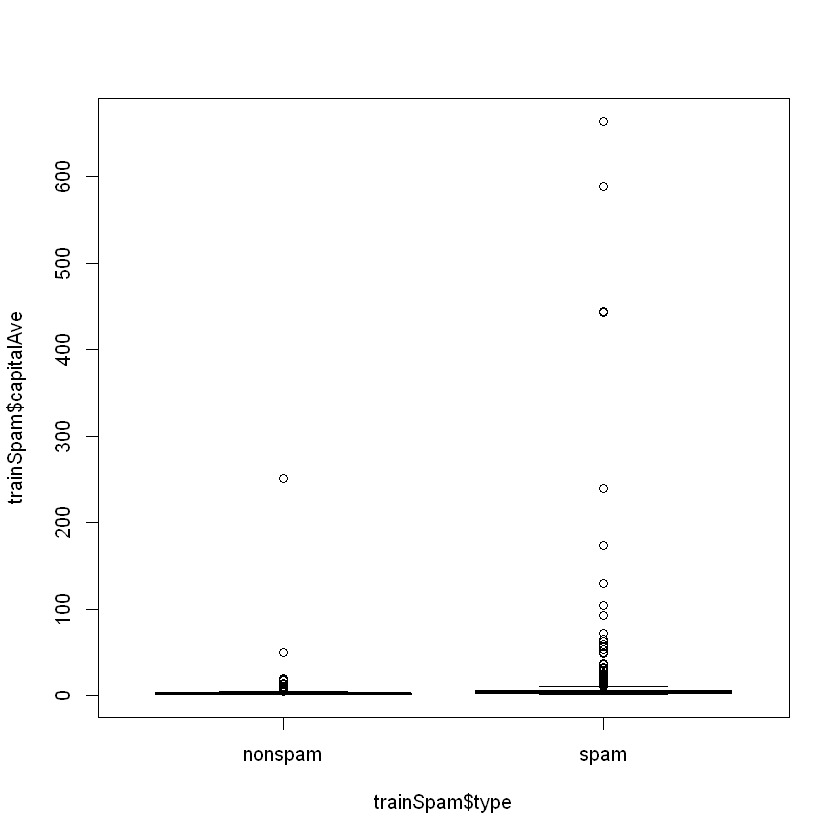

In [8]:
plot(trainSpam$capitalAve~trainSpam$type)

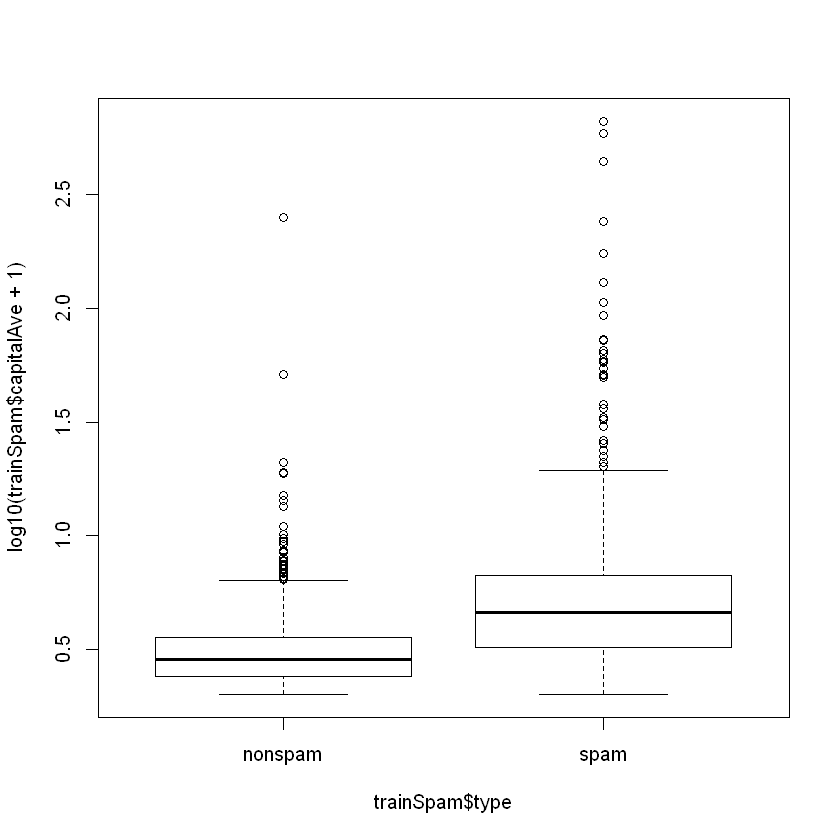

In [9]:
plot(log10(trainSpam$capitalAve+1)~trainSpam$type)

### Relationship between predictors

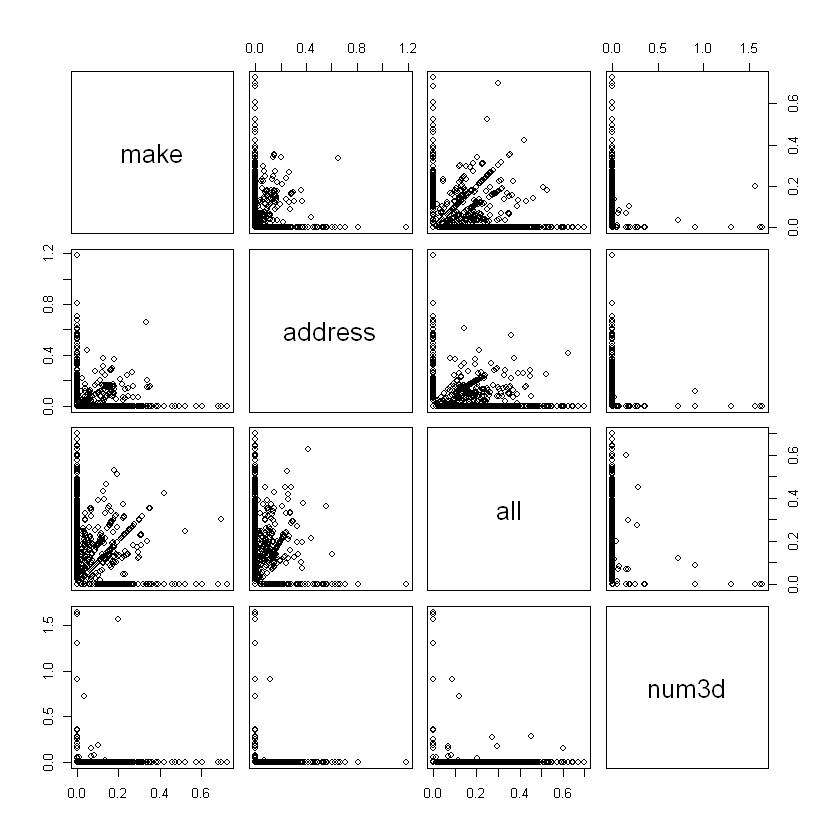

In [10]:
plot(log10(trainSpam[,1:4]+1))

### Clustering

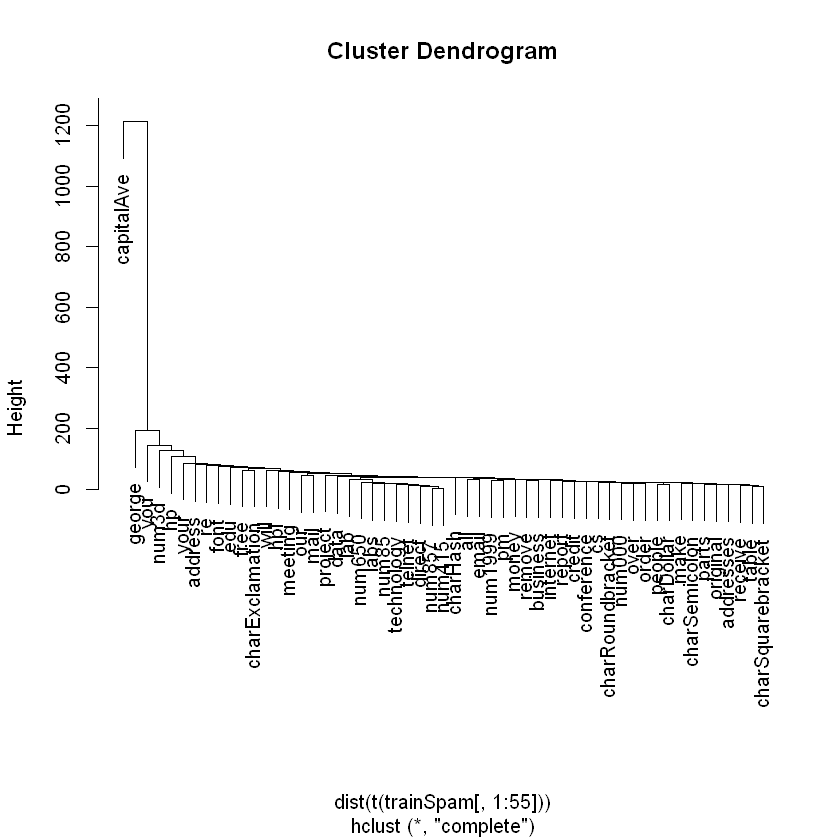

In [11]:
hCluster <- hclust(dist(t(trainSpam[,1:55])))
plot(hCluster)

### New Clustering

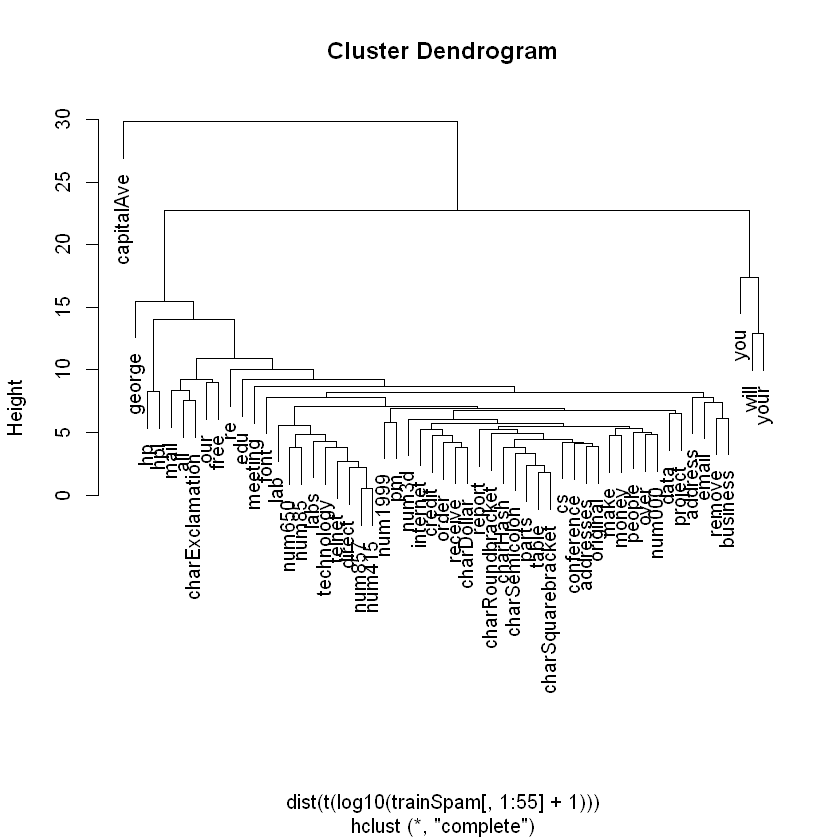

In [12]:
hClusterUpdate <- hclust(dist(t(log10(trainSpam[,1:55]+1))))
plot(hClusterUpdate)

## Statistical Prediction/modeling
* Should be informed by the results of your exploratory analysis
* Exact question depends on the question of interest
* Transformations/processing should be accounted for when necessary
* Measures of uncertainity should be reported

In [25]:
options(warn = -1)
trainSpam$numType = as.numeric(trainSpam$type) - 1
costFunction = function(x, y) sum(x != (y > 0.5))
cvError = rep(NA, 55)

library(boot)

for (i in 1:55) {
    lmFormula = reformulate(names(trainSpam)[i], response = "numType")
    glmFit = glm(lmFormula, family = "binomial", data = trainSpam)
    cvError[i] = cv.glm(trainSpam, glmFit, costFunction, 2)$delta[2]
}

## Which predictor has minimum cross-validated error?
names(trainSpam)[which.min(cvError)]

[1] "charDollar"

## Get a measure of uncertainty

In [26]:
## Use the best model from the group
predictionModel = glm(numType ~ charDollar, family = "binomial", data = trainSpam)
## Get predictions on the test set
predictionTest = predict(predictionModel, testSpam)
predictedSpam = rep("nonspam", dim(testSpam)[1])
## Classify as `spam' for those with prob > 0.5
predictedSpam[predictionModel$fitted > 0.5] = "spam"

In [28]:
## Classification table
table(predictedSpam, testSpam$type)

             
predictedSpam nonspam spam
      nonspam    1346  458
      spam         61  449

In [30]:
(61+458)/(1346+458+61+449)

[1] 0.2242869

## Interpret results
* Use the appropriate language
    - describes
    - correlates with/associated with
    - leads to/causes
    - predicts
* Give an explanation
* Interpret coefficients
* Interpret measures of uncertainty

### Our example
* The fraction of charcters that are dollar signs can be used to predict if an email is Spam
* Anything with more than 6.6% dollar signs is classified as Spam
* More dollar signs always means more Spam under our prediction
* Our test set error rate was 22.4%

## Challenge results
* Challenge all steps:
    - Question
    - Data source
    - Processing
    - Analysis
    - Conclusions
* Challenge measures of uncertainty
* Challenge choices of terms to include in mo
* Think of potential alternative analyses

## Synthesize/write-up results
* Lead with the question
* Summarize the analyses into the story
* Don't include every analysis, include it
    - If it is needed for the story
    - If it is needed to address a challenge
* Order analyses according to the story, rather than chrono
* Include "pretty" figures that contribute to the story

## In our example
* Lead with the question
    - Can I use quantitative characteristics of the emails to classify them as SPAM/HAM?
* Describe the approach
    - Collected data from UCI -> created training/test sets
    - Explored relationships
    - Choose logistic model on training set by cross validation
    - Applied to test, 78% test set accuracy
* Interpret results
    - Number of dollar signs seems reasonable, e.g. "Make money with Viagra $ $ $ $!"
* Challenge results
    - 78% isn't that great
    - I could use more variables
    - Why logistic regression?